In [1]:
import numpy as np

# Dynamic Programming

This method is based on bellman's equations:

* Q-value: $Q(s,a) = \sum_{a \in A} p(s' | s, a) \cdot (r + V_{\pi'}(s'))$
* State value: $V_\pi(s) = \sum_{a \in A} \pi(a|s) \cdot Q_(s, a)$

Where:
* $s$ is the current state
* $a$ is an action to be performed at $s$
* $\pi$ is the current policy at $s$
* $s'$ and $\pi'$ are the equivalents for the next state after performing $a$

This can be understood using the following image:

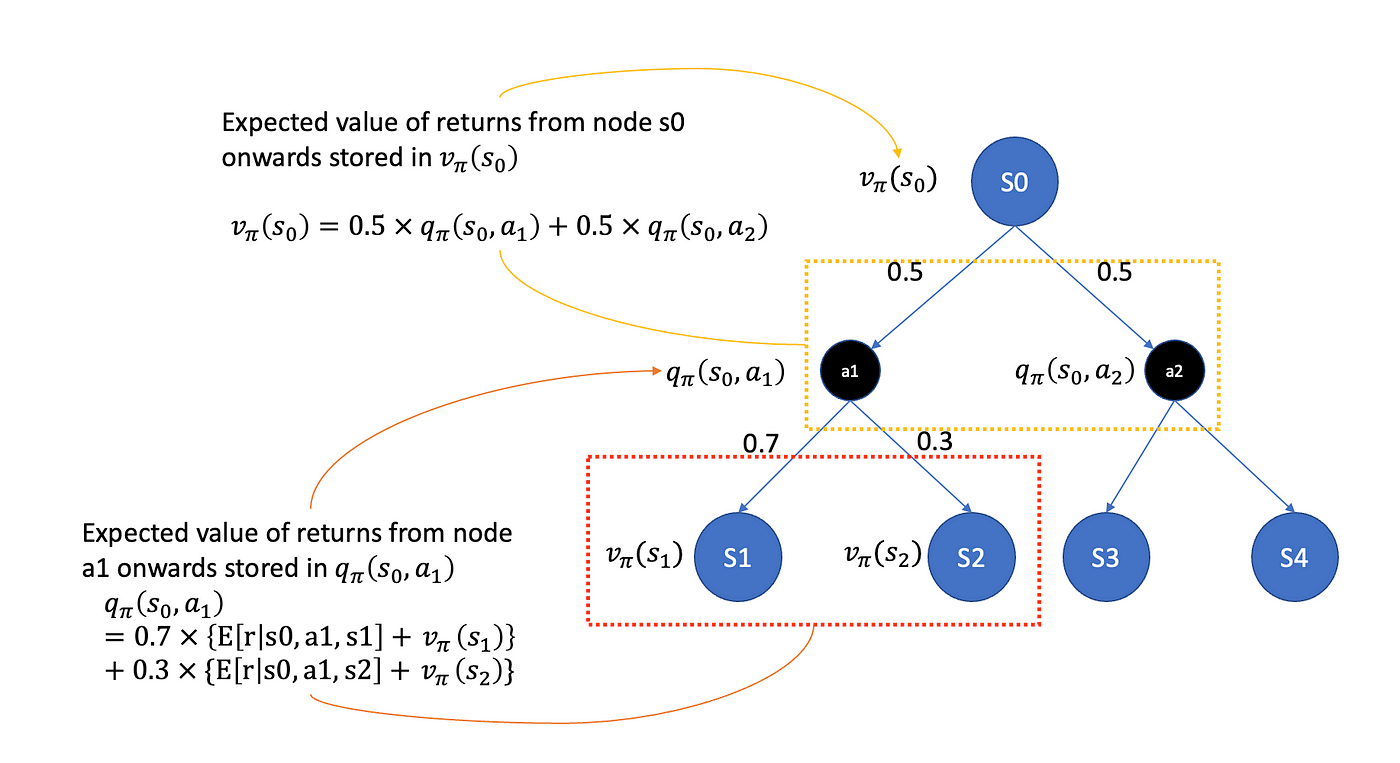

## Policy iteration

This method is based on the aforementioned equations, using the following logic:

All the possible states are checked* and updated their state value at every iteration. Then, the best action is calculated for the new state values, and if the action $a$ taken at state $s$ (using policy $\pi$) differs to the one taken knowing the new value for the same state, then the steps are repeted until the policy is stable, i.e, the previous action is the same as the new one.

To sum it all up

0) Initialize $\pi$ for every state $s$ with equal probabilities for each action $a$
1) Update $V(s)$ using the formulae
2) Compare best $a$ under previous $\pi$ and best $a$ under new $\pi$
3) if best $a_{old \ \pi}$ is different to $a_{new \ \pi}$, then start from (1) or else stop

\* this is only true for dynamic programming. In more optimal algorithms, some states might not checked at all since it'd depend on a exploration-exploitation factor that relies on probabilities

### Find the beer game

Let's use dynamic programming with policy iteration to solve a simplistic problem regarding an agent having to find a beer (goal) in a 1x8 matrix just like so:

```
°------°---°---°------°---°---°---°---°
| hole |   |   | beer |   |   |   |   |   
°------°---°---°------°---°---°---°---°
```
Where the agent could spawn at any of the 8 squares (including both the hole and the beer squares). The goal is to find best policy that makes the agent win.

In [217]:
# initialize every action with the same importance or probability
optimal_policy = [[0.5,0.5],
                  [0.5,0.5],
                  [0.5,0.5],
                  [0.5,0.5],
                  [0.5,0.5],
                  [0.5,0.5],
                  [0.5,0.5],
                  [0.5,0.5]
                  ]
optimal_policy

[[0.5, 0.5],
 [0.5, 0.5],
 [0.5, 0.5],
 [0.5, 0.5],
 [0.5, 0.5],
 [0.5, 0.5],
 [0.5, 0.5],
 [0.5, 0.5]]

In [218]:
# a mapping between state (list index) and possible actions (the values)
possible_actions = [
    [None, None], # a None represents an invalid movement
    [-100.0, -1.0], # a -1.0 represents a valid movement to either the left or right
    [-1.0, 1.0],
    [None, None], # goal, no possible action in this state
    [1.0, -1.0],
    [-1.0, -1.0],
    [-1.0, -1.0],
    [-1.0, None],
]

possible_actions

[[None, None],
 [-100.0, -1.0],
 [-1.0, 1.0],
 [None, None],
 [1.0, -1.0],
 [-1.0, -1.0],
 [-1.0, -1.0],
 [-1.0, None]]

In [219]:
# state values are initialized at 0.0
state_values = [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0
]

In [220]:
def update_state_values(optimal_policy, possible_actions, state_values):
    for state in range(len(state_values)):
        for i, action in enumerate(possible_actions[state]):
            if action is not None:
                next_state = state + (-1 if i == 0 else 1)
                state_values[state] += optimal_policy[state][i] * (possible_actions[state][i] + state_values[next_state])

def check_policy_stability(optimal_policy, possible_actions, state_values):
    for state in range(len(state_values)):
        if all(action is None for action in possible_actions[state]): # hole or goal don't have policy
            continue
        prev_best_action = np.argmax(optimal_policy[state])
        new_best_action = None
        best_q_value = float("-inf")
        for i, action in enumerate(possible_actions[state]):
            if action is not None:
                next_state = state + (-1 if i == 0 else 1) # action 0 means left (state - 1) and action 1 means right (state + 1)
                q_value = possible_actions[state][i] + state_values[next_state]
                if q_value > best_q_value:
                    best_q_value = q_value
                    new_best_action = i
        optimal_policy[state] = [0.0]*2
        optimal_policy[state][new_best_action] = 1.0
        
        if new_best_action != prev_best_action:
            return False
    return True


stable_policy = False
max_steps = 10
i = 0
while not stable_policy and i < max_steps:
    update_state_values(optimal_policy, possible_actions, state_values)
    stable_policy = check_policy_stability(optimal_policy, possible_actions, state_values)
    i += 1
print(f"Optimal policy for problem:\n{optimal_policy}")
print(f"Iterations: {i}")
    



Optimal policy for problem:
[[0.5, 0.5], [0.0, 1.0], [0.0, 1.0], [0.5, 0.5], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
Iterations: 3


In [221]:
state_values

[0.0, -141.375, -62.625, 0.0, -2.0, -7.3125, -11.3125, -10.21875]

In [222]:
["L" if np.argmax(state_policy) == 0 and i not in (0,3) else "R" if i not in (0,3) else "NA" for i, state_policy in enumerate(optimal_policy)]
    

['NA', 'R', 'R', 'NA', 'L', 'L', 'L', 'L']